In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-04-16 14:57:55.107597: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-16 14:57:55.374515: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 14:57:55.374565: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 14:57:55.375712: E tensorflow/c

# Read data

In [2]:
file_path = os.path.join("data","Preprocessed_AFData.xlsx")

df = pd.read_excel(file_path)
df

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,...,data22,data23,data24,data25,data26,data27,data28,data29,data30,Control
0,0.0,0.0,0.0,0.1,-0.1,0.000000,0.000000,0.400000,0.100000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,1.000000,-0.400000,-0.600000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.954545,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.0,0.0,0.0,0.5,0.5,-0.071429,-0.214286,-0.357143,-0.214286,0.071429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
149996,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
149997,0.0,0.0,0.3,0.7,-0.8,0.200000,-0.050000,-0.050000,-0.150000,-0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
149998,0.0,0.0,0.0,0.0,0.0,0.050000,0.000000,-0.050000,0.050000,-0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Split train and test data

## Deal with class imbalance

In [3]:
df_0 = df[df["Control"] == 0]
df_1 = df[df["Control"] == 1]

label_1_num = len(df_1)

data = np.vstack(((df_0[:label_1_num]).to_numpy(), df_1.to_numpy()))
np.random.shuffle(data)

X = data[:, :30]
y = data[:, -1]

X.shape, y.shape

((73074, 30), (73074,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Add the rest of the data to test
# tail = (df_0[label_1_num:]).to_numpy()

# X_test = np.vstack((X_test, tail[:, :30]))
# y_test = np.concatenate((y_test, (tail[:, -1])))

# Build Model

In [172]:
# Define the model
model = Sequential()

# Input layer (30 neurons)
model.add(Dense(30, input_dim=30, activation='tanh'))

# Hidden layers (4 layers)
model.add(Dense(90, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (1 neuron)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model

In [173]:
class_weight = {0: 1, 1: 7}

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_split=0.1, class_weight=class_weight)
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/12
1645/1645 [==============================] - 3s 1ms/step - loss: 0.5496 - accuracy: 0.8529 - val_loss: 0.3277 - val_accuracy: 0.8454
Epoch 2/12
1645/1645 [==============================] - 2s 1ms/step - loss: 0.4475 - accuracy: 0.8814 - val_loss: 0.2238 - val_accuracy: 0.9102
Epoch 3/12
1645/1645 [==============================] - 2s 1ms/step - loss: 0.4321 - accuracy: 0.8852 - val_loss: 0.2797 - val_accuracy: 0.8707
Epoch 4/12
1645/1645 [==============================] - 2s 1ms/step - loss: 0.4249 - accuracy: 0.8870 - val_loss: 0.2820 - val_accuracy: 0.8404
Epoch 5/12
1645/1645 [==============================] - 3s 2ms/step - loss: 0.4188 - accuracy: 0.8872 - val_loss: 0.2641 - val_accuracy: 0.9059
Epoch 6/12
1645/1645 [==============================] - 3s 2ms/step - loss: 0.4127 - accuracy: 0.8926 - val_loss: 0.2549 - val_accuracy: 0.9107
Epoch 7/12
1645/1645 [==============================] - 3s 2ms/step - loss: 0.4103 - accuracy: 0.8964 - val_loss: 0.2821 - val_accuracy:

In [177]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

457/457 [==============================] - 0s 726us/step - loss: 0.2795 - accuracy: 0.8938
Test accuracy: 0.8938077092170715


# Evaluate Model

In [178]:
predicted_numbers = model.predict(X_test)
predicted_labels = np.array(predicted_numbers > 0.5, dtype=np.uint)

457/457 [==============================] - 0s 597us/step


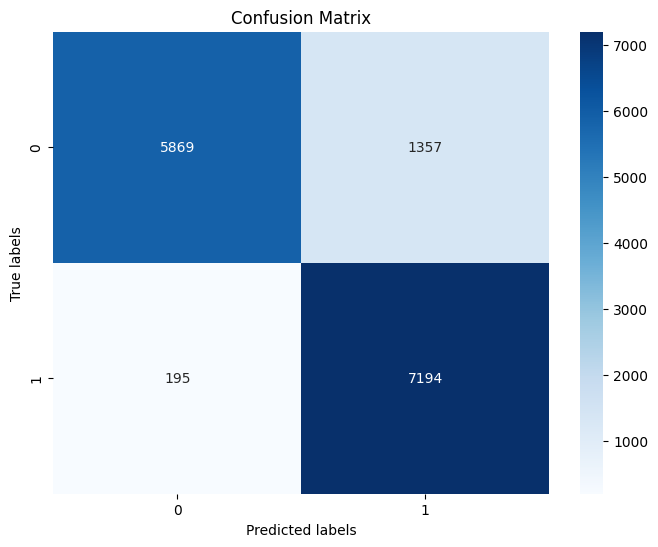

In [179]:
cm = confusion_matrix(np.array(y_test), predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Adding labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [161]:
140/len(predicted_labels)*100

0.9579199452617174

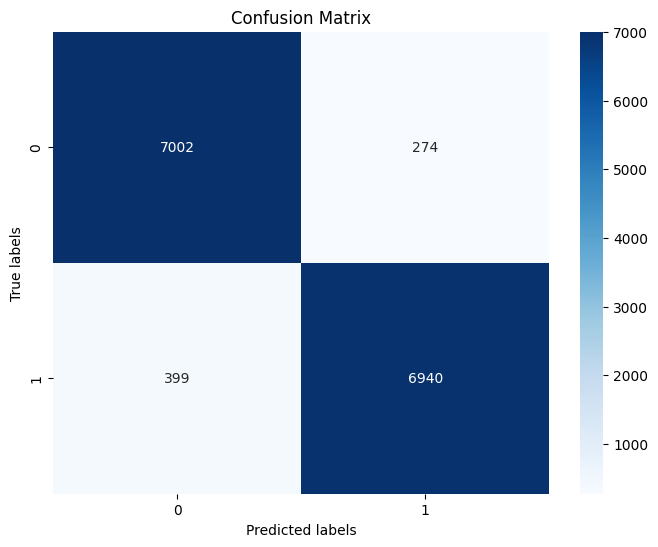

In [11]:
cm = confusion_matrix(np.array(y_test), predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Adding labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [11]:
399/len(predicted_labels)*100

2.7300718439958946

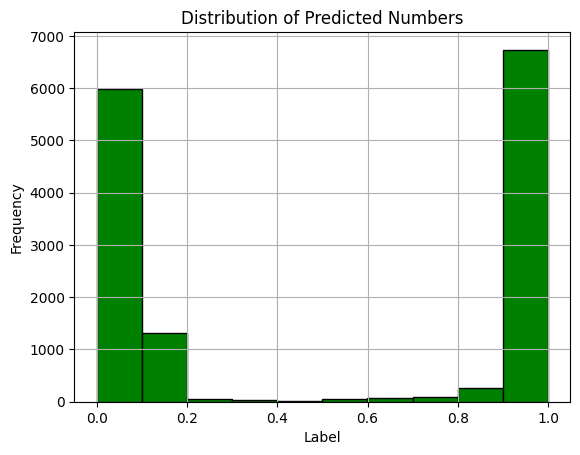

In [12]:
plt.hist(predicted_numbers, bins=10, edgecolor='black', color="g")
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Numbers')
plt.grid(True)
plt.show()

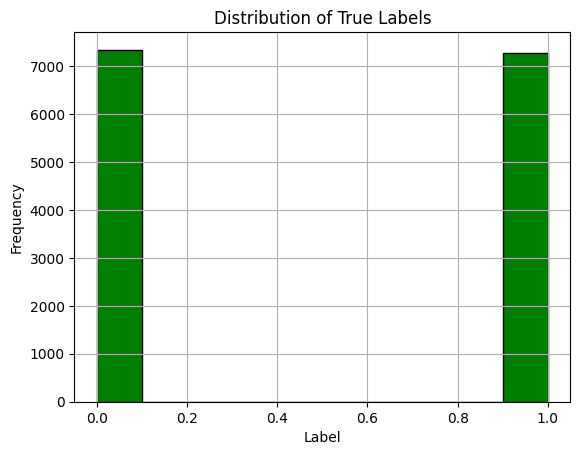

In [7]:
plt.hist(y_test, color="g", edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of True Labels')
plt.grid(True)
plt.show()

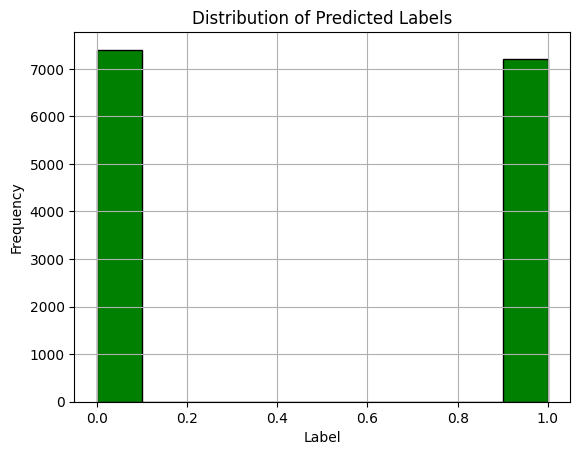

In [14]:
plt.hist(predicted_labels, edgecolor='black', color="g")
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Labels')
plt.grid(True)
plt.show()